In [182]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])

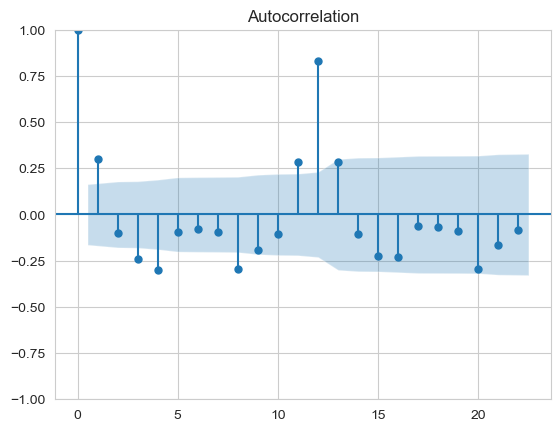

In [183]:
plot_acf(df[['Passengers']].diff().dropna())
plt.show()

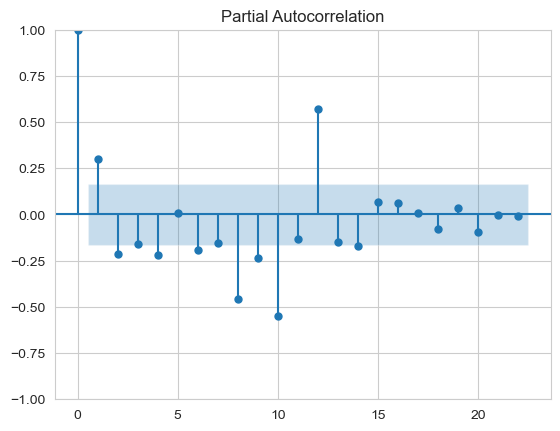

In [184]:
plot_pacf(df[['Passengers']].diff().dropna())
plt.show()

In [185]:
from statsmodels.tsa.stattools import adfuller

dftest= adfuller(df[['Passengers']].diff().dropna())

dftest

(-2.829266824170004,
 0.05421329028382491,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [186]:
d = dftest[1]

print(f'd value = {d}')

d value = 0.05421329028382491


In [228]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Passengers'], seasonal_order=(2, 1, 2, 12))
model_fit = model.fit()

forecast = model_fit.forecast(steps=24)

print(forecast)

C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


144    446.688643
145    419.158540
146    455.673668
147    485.417111
148    503.915296
149    575.977986
150    670.172538
151    666.803672
152    547.398658
153    492.533175
154    420.789291
155    462.954314
156    480.139077
157    450.805661
158    484.992526
159    520.476730
160    543.740954
161    616.399931
162    722.232531
163    723.327008
164    586.591929
165    531.182844
166    452.957783
167    496.504389
Name: predicted_mean, dtype: float64


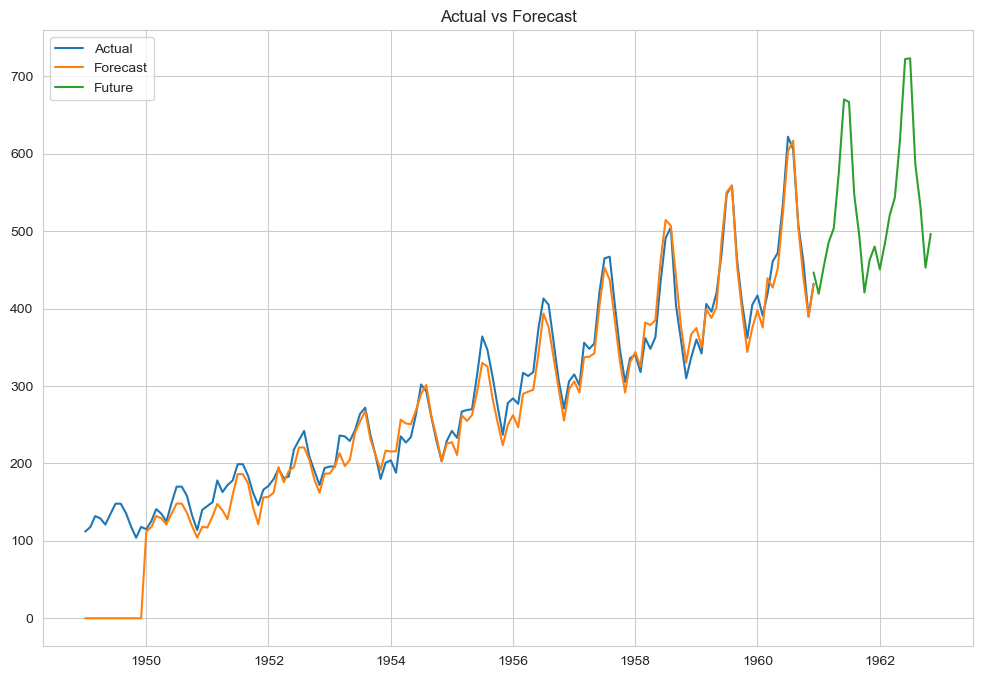

In [229]:
fig, ax = plt.subplots(figsize=(12, 8))

range = pd.date_range(df['Month'].max(), periods=24, freq='MS')

ax.plot(df['Month'], df['Passengers'], label='Actual')
ax.plot(df['Month'], model_fit.predict(),  label='Forecast')
ax.plot(range, forecast,  label='Future')

plt.legend()

plt.title("Actual vs Forecast")

plt.show()